In [81]:
from prettytable import PrettyTable as PrettyTable
import random
import os

from src.Agent import Agent
from src.Environment import Environment

from src.utils import load_data, print_stats, plot_multiple_conf_interval

In [82]:
#!c1.4
data_path = "./input/"
models_path = "./models/"
df = load_data(data_path)

# ----------------------------- AGENTS COMPARISON --------------------------------
REPLAY_MEM_SIZE = 10000
BATCH_SIZE = 40
GAMMA = 0.98
EPS_START = 1
EPS_END = 0.12
EPS_STEPS = 300
LEARNING_RATE = 0.001
INPUT_DIM = 24
HIDDEN_DIM = 120
ACTION_NUMBER = 3
TARGET_UPDATE = 10
N_TEST = 10
TRADING_PERIOD = 4000

index = random.randrange(len(df) - TRADING_PERIOD - 1)

Shape of aggregated dataset: (35058, 4)


# ProfitDDQN Agent
profit_ddqn_return

In [83]:
double_dqn_agent = Agent(
    REPLAY_MEM_SIZE,
    BATCH_SIZE,
    GAMMA,
    EPS_START,
    EPS_END,
    EPS_STEPS,
    LEARNING_RATE,
    INPUT_DIM,
    HIDDEN_DIM,
    ACTION_NUMBER,
    TARGET_UPDATE,
    MODEL="dqn",
    DOUBLE=True,
)

Agent is using device:	cuda


In [84]:
train_size = int(TRADING_PERIOD * 0.8)
profit_ddqn_return = []

In [85]:
Train = not os.path.isfile(path=os.path.join(models_path, 'profit_reward_double_dqn_model'))
print('pretrainded model exist:', Train)

pretrainded model exist: False


In [86]:
if Train:
    profit_train_env = Environment(df[index : index + train_size], "profit")    
    double_dqn_agent_test = double_dqn_agent.train(profit_train_env, models_path)

In [87]:
profit_test_env = Environment(
    df[index + train_size : index + TRADING_PERIOD], "profit"
)

In [88]:
# Profit Double DQN
double_dqn_agent_test, _ = double_dqn_agent.test(
    profit_test_env, model_name="profit_reward_double_dqn_model", path=models_path
)
profit_ddqn_return.append(profit_test_env.cumulative_return)
profit_test_env.reset()

 97%|█████████▋| 775/800 [00:01<00:00, 412.03it/s]


In [89]:
i = 0
while i < N_TEST:
    print("Test nr. %s" % str(i + 1))
    index = random.randrange(len(df) - TRADING_PERIOD - 1)

    profit_test_env = Environment(
        df[index + train_size : index + TRADING_PERIOD], "profit"
    )
    
    # Profit Double DQN
    double_dqn_agent_test, _ = double_dqn_agent.test(
        profit_test_env, model_name="profit_reward_double_dqn_model", path=models_path
    )
    profit_ddqn_return.append(profit_test_env.cumulative_return)
    profit_test_env.reset()
    
    i += 1

Test nr. 1


 97%|█████████▋| 775/800 [00:01<00:00, 454.13it/s]


Test nr. 2


 97%|█████████▋| 775/800 [00:01<00:00, 460.68it/s]


Test nr. 3


 97%|█████████▋| 775/800 [00:01<00:00, 421.89it/s]


Test nr. 4


 97%|█████████▋| 775/800 [00:01<00:00, 405.55it/s]


Test nr. 5


 97%|█████████▋| 775/800 [00:01<00:00, 480.14it/s]


Test nr. 6


 97%|█████████▋| 775/800 [00:01<00:00, 462.13it/s]


Test nr. 7


 97%|█████████▋| 775/800 [00:02<00:00, 321.55it/s]


Test nr. 8


 97%|█████████▋| 775/800 [00:02<00:00, 354.51it/s]


Test nr. 9


 97%|█████████▋| 775/800 [00:01<00:00, 460.24it/s]


Test nr. 10


 97%|█████████▋| 775/800 [00:01<00:00, 481.43it/s]


In [90]:
t = PrettyTable(
    [
        "Trading System",
        "Avg. Return (%)",
        "Max Return (%)",
        "Min Return (%)",
        "Std. Dev.",
    ]
)
print_stats("ProfitDDQN", profit_ddqn_return, t)
print(t)

+----------------+-----------------+----------------+----------------+-----------+
| Trading System | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |
+----------------+-----------------+----------------+----------------+-----------+
|   ProfitDDQN   |      31.72      |     704.51     |     -57.93     |   74.86   |
+----------------+-----------------+----------------+----------------+-----------+


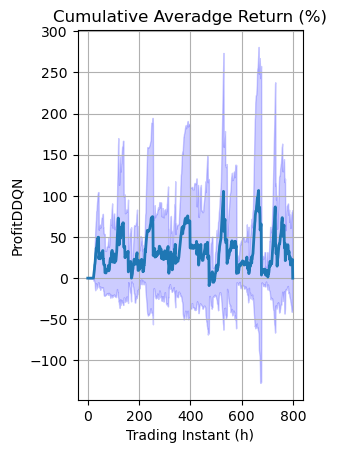

In [91]:
plot_multiple_conf_interval(
    [
        "ProfitDDQN",
    ],
    [
        profit_ddqn_return,
    ],
)